An interactive Phase Diagram for the Fisher ODE
---------------------

This jupyter notebook presents an interactive plot for the phase diagram of the Fisher ODE,
which describes the shape of the travelling wave in the Fisher-KPP equation.

$$
\begin{cases}
       U' = V \\
       V' = - f(U)/D_1 - c V/D_1
\end{cases}
$$

Here we consider values $ 0 \leq c \leq c_{critical}$ - usually travelling waves do not exist in this parameter range, 
but they do appear in the *Pushing the Boundary* model with an explicitly moving boundary.

In [12]:
# import dependencies
from ipywidgets import interact
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

### 1. Define the data

First of all, we introduce the default growth function: the logistsic growth.

In [13]:
def logistic_growth(x):
    return np.multiply(x,1-x)

We define the vector-valued function to be plotted in the phase diagram.

In [14]:
def derivative(U,V,c=1,D1=1,f=lambda x : x):
    """
    Returns the derivatives of the Fisher-ODE.
    
    Inputs
    ------
    U    array of length N
    V    array of length N
    c    positive scalar, wave speed
    D1   positive scalar, diffusion coefficient
    f    scalar function, mapping state U to growth rate f(U)
         default: exponential growth
    
    Returns
    -------
    U_prime   array of length U
    V_prime   array of length V
    
    Example
    -------
    >>> def f(x):
        return np.multiply(x,1-x)
    >>> U = np.ones(3), V=np.ones(3)
    >>> print(np.array(derivative(U,V,c=2),f=f))
    [[ 1.  1.  1.]
     [-2. -2. -2.]]
    
    """
    assert len(U)==len(V), "Input arrays must have the same length N."
    
    U_prime = V
    V_prime = -f(U)/D1 - c*V/D1
    
    
    return U_prime, V_prime

We test the implemented derivative.

In [15]:
U = np.ones(3)
V = np.ones(3)*0
print(np.array(derivative(U,V,c=2,f=logistic_growth)))

[[ 0.  0.  0.]
 [-0. -0. -0.]]


Seems to work well.

#### Prepare the input for the plot function. 

In [29]:
# N is the number of gridpoints on each axis
N=37

#X and Y set the coordinates of the arrows' bases
X = np.linspace(-0.25,1.25,N)
Y = np.linspace(0.25, -1.25, N)

In [30]:
U,V = np.meshgrid(X,Y)

In [31]:
print(U.shape)

(37, 37)


In [32]:
print(derivative(U,V,c=2,f=logistic_growth)[0].shape)

(37, 37)


### Somewhere in the following computation something is going wrong.

In [33]:
def arrow_directions(c=1):
    """Returns arrow directions for c"""
    shape = U.shape
    U_prime, V_prime = derivative(U,V,c,f=logistic_growth)
    return U_prime, V_prime

# U and V set the direction each arrow points to
U_prime, V_prime = arrow_directions()

<IPython.core.display.Javascript object>


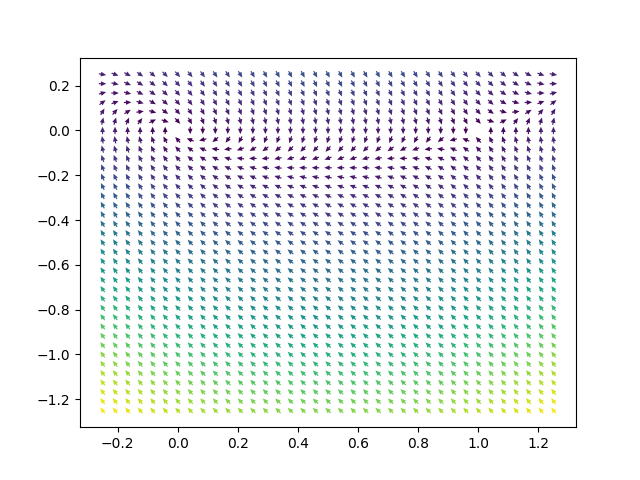

/home/jf/.virtualenvs/Beavers/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
opts=dict(pivot='mid',angles='xy', units='x', headwidth='4', headlength='4.5')#, headaxislength='4.5')

def plot_quiver(U_prime,V_prime):
    """wrapper to plot the vector field"""
    # use the length of the arrows to create a color map
    M = np.hypot(U_prime, V_prime)
    # we want to normalize arrow length and indicate strength via the color map
    X,Y = np.divide(U_prime,M), np.divide(V_prime,M)
    q = ax.quiver(U, V, X, Y, M,**opts)
    #ax.quiverkey(q, U=0.3, V=1.1, U=10,
             #label='Quiver key, length = 10', labelpos='E')
    fig.show()

plot_quiver(U_prime,V_prime)


In [11]:
def update(c = (0,3,0.25)):
    # U and V set the direction each arrow points to
    U_prime, V_prime = arrow_directions(c)
    ax.clear()
    plot_quiver(U_prime,V_prime)

interact(update);

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0, step=0.25), Output()), _dom_classes=('w…